# Comment expliquer la violence par armes à feu aux Etats-Unis ?

*Python pour la data science - Matis Bruneau, Eloïse Leroux, Matthieu Grenier - 2023-2024*

Au cours de ce projet, nous essayons de fournir des éléments de réponse autour de la question de la violence par armes à feu aux Etats-Unis. Autrement dit, est-il possible d'identifier certains facteurs à l'origine de ces indicidents ? Deux questions majeures traversent cette analyse : 1) Peut-on prédire la fréquence de ces incidents ? 2) Peut-on prédire les conséquences humaines et matérielles de ces incidents ?

Ce projet est motivé par une [base de données](https://github.com/jamesqo/gun-violence-data) recensant tous les incidents impliquant des armes à feu ayant survenu aux Etats-Unis entre 2013 et 2018, soit près de 260 000 entrées.


Afin d'en proposer une étude cohérente, nous nous appuyons sur plusieurs autres sources de données : une série de données socio-économiques auprès des comtés américains, leur positionnement politique, le nombre de *background checks* par Etat, et une synthèse des différences de législation entre Etats.

## 1 - Récupération et traitement des données

Une première phase d'extraction et de traitement de nos données est nécessaire avant de pouvoir produire une quelconque analyse sur le sujet. En effet, nous nous appuyons sur 5 bases de données différentes, toutes en accès public :

| Nom de la base  | Description  | Source  | Mode d'extraction  |
|---|---|---|---|
| gun_violence_db   | Incidents par armes à feu aux USA entre 2013 et 2018  |  Gun Violence Archive | CSV  |
|  counties_db   | Caractéristiques socio-économiques des comtés américains  | FRED (Federal Reserve Economic Data)  | API   |
| geo_counties  |  Fonds de cartes des comtés américains  | United States Census Bureau  | SHP  |
| legislation_db  | Différences de législation entre Etats concernant les armes à feu   | Boston University School of Public Health  | CSV  |
| bg_checks_db | Nombre de *background checks* réalisés par le FBI  | FBI  |  CSV |
| vote_db   | Part de vote démocrate et républicain par comté  | GitHub  (FOX News) | CSV  |  

La grande majorité des variables d'intérêt contenues dans ces bases de données sont retenues sur la même plage temporelle que celle des données principales analysées (2013-2018). Seule la base legislation_db ne conserve que les données de l'année 2015, en retenant les lois anti-armes à feu en vigueur au cours de cette année.

Pour la plupart des données, les fichiers CSV sont directement téléchargés. Nénanoins l'API FRED présente un nombre de requêtes limité par minute, c'est pourquoi il n'est pas conseillé (à moins d'avoir 2h30 devant soi) de réexécuter le code des cellules concernées.

Le développement complet sur le mode d'extraction ainsi que les codes associés peut être trouvé sur [ce notebook](./traitements_donnes.ipynb).


## 2 - Analyse prédictive de la violence armée en fonction des caractéristiques individuelles

Dans cette partie, nous essayons de décrire les tendances générales des incidents pour pouvoir commencer le travail d'élaboration de notre modèle prédictif. Nous étudions d'abord la réalisation des incidents, c'est-à-dire les caractéristiques générales les entourant. Puis, nous étudions les conséquences humaines de la réalisation de ces incidents.

### A) Fréquence des incidents 

In [ ]:
%run 1_traitement_gun_violence.ipynb

In [ ]:
%run 1_stat_desc_gun_violence.ipynb

### B) Conséquences humaines des incidents

In [ ]:
%run 2_stat_des_consequences.ipynb

## 3 - Analyse prédictive de la violence par armes à feu à partir des caractéristiques structurelles des comtés

A présent, nous nous intéressons au caractère prédictif des incidents à partir des comtés où ils sont survenus. Autrement dit, nous proposons une étude des effets structurels des comtés : chômage, population, vote, etc. 


In [ ]:
%run 3_stat_des_counties.ipynb

## 4 - Modélisation par régression linéaire

Enfin, nous proposons ici un modèle linéaire ayant pour objectif de prédire le nombre d'incidents par armes à feu allant survenir **dans chaque comté**, ainsi que le nombre de morts et le nombre de blessés. Nous utilisons à cette effigie 7 variables d'intérêt, toutes mesurées en 2015:
| Nom de la variable  | Description  |
|---|---|
| med_h_income_year_2015   | Revenu médian  |
|  unemp_rate_year_2015  | Taux de chômage  |
| snap_beneficiaries_year_2015  |  Nombre de bénéficiaires de l'aide alimentaire |
| bachelors_deg_year_2015  | Part de la population détentrice d'un *Bachelor's Degree*   |
| bchecks_2015 | Nombre de *background checks* réalisés par le FBI  |
| score_legis   | Score de législation  |
| pop_density | Densité de population du comté|

Les résultats de ces régressions sont présentées et les commentaires associés sont présentés ci-dessous.

Nous effectuons également une analyse par Lasso pour vérifier que toutes les variables contribuent à la baisse de l'erreur quadratique moyenne.

/tmp/ipykernel_684233/2455505233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_data['pop_density'] = counties_db['resident_pop_year_2015']/counties_db['geometry'].area
/tmp/ipykernel_684233/443181102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_data['area'] = counties_db['geometry'].area


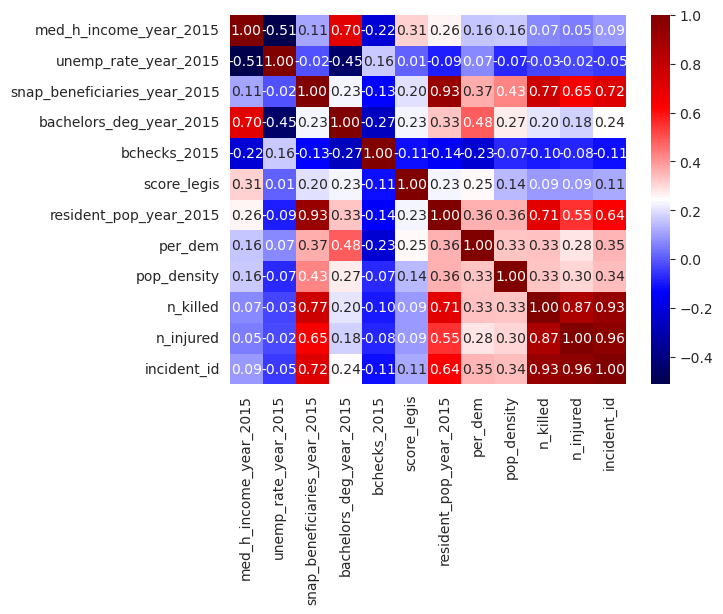

                            OLS Regression Results                            
Dep. Variable:               n_killed   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     39.55
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.45e-52
Time:                        20:47:56   Log-Likelihood:                -9023.8
No. Observations:                2157   AIC:                         1.806e+04
Df Residuals:                    2149   BIC:                         1.811e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

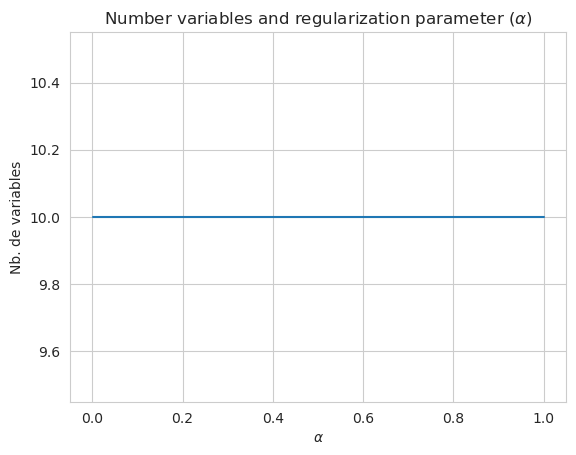

In [14]:
%run 4_modelisation.ipynb